In [1]:
pip install pandas numpy matplotlib seaborn statsmodels scikit-learn


[notice] A new release of pip is available: 25.1.1 -> 26.0
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# ============================================================================
# ANÁLISIS EXPLORATORIO DE DATOS (EDA) - PROYECTO COMERCIOYA
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print('✓ Librerías importadas')

✓ Librerías importadas


In [3]:
# ============================================================================
# LECCIÓN 1.1: EDA.. GENERAR DATASET
# ============================================================================

np.random.seed(42)
n_registros = 500

datos = {
    'cliente_id': np.arange(1, n_registros + 1),
    'edad': np.random.randint(18, 75, n_registros),
    'num_compras': np.random.randint(1, 50, n_registros),
    'monto_gastado_usd': np.random.exponential(150, n_registros).round(2),
    'num_visitas': np.random.randint(5, 200, n_registros),
    'num_devoluciones': np.random.randint(0, 10, n_registros),
    'calificacion_promedio': np.random.uniform(1, 5, n_registros).round(1),
    'categoria_preferida': np.random.choice(['Electrónica', 'Ropa', 'Hogar', 'Deportes'], n_registros),
    'canal_compra': np.random.choice(['Web', 'Móvil', 'Tienda'], n_registros),
    'cliente_frecuente': np.random.choice(['Sí', 'No'], n_registros)
}

df = pd.DataFrame(datos)

# Añadir valores faltantes
missing_indices = np.random.choice(df.index, 15, replace=False)
df.loc[missing_indices, 'calificacion_promedio'] = np.nan

missing_indices = np.random.choice(df.index, 10, replace=False)
df.loc[missing_indices, 'num_devoluciones'] = np.nan

print(f'✓ Dataset: {df.shape[0]} registros x {df.shape[1]} variables\n')
print(df.head())


✓ Dataset: 500 registros x 10 variables

   cliente_id  edad  num_compras  monto_gastado_usd  num_visitas  \
0           1    56           44             279.11          150   
1           2    69           44             207.71           41   
2           3    46            5               4.64           64   
3           4    32           39             302.85          180   
4           5    60            4              65.58           32   

   num_devoluciones  calificacion_promedio categoria_preferida canal_compra  \
0               3.0                    4.8               Hogar          Web   
1               0.0                    2.0                Ropa       Tienda   
2               0.0                    1.5               Hogar       Tienda   
3               2.0                    1.8         Electrónica        Móvil   
4               4.0                    4.5         Electrónica       Tienda   

  cliente_frecuente  
0                No  
1                Sí  
2        

In [4]:
# ============================================================================
# LECCIÓN 1.2:  EDA. ANÁLISIS INICIAL
# ============================================================================

print('=== INFORMACIÓN DEL DATASET ===')
print(df.info())

vars_cuantitativas = df.select_dtypes(include=[np.number]).columns.tolist()
vars_categoricas = df.select_dtypes(include=['object']).columns.tolist()

print(f'\nCUANTITATIVAS: {vars_cuantitativas}')
print(f'CATEGÓRICAS: {vars_categoricas}')

print('\n=== VALORES FALTANTES ===')
missing = df.isna().sum()
print(missing[missing > 0])


# Mostrar filas con al menos un NaN
print('\n=== FILAS CON VALORES NaN ===')
nan_rows = df[df.isna().any(axis=1)]
print(f'Total filas con al menos 1 NaN: {len(nan_rows)}')
print(nan_rows.head(10))
print(df.iloc[87].to_string())

# Ajuste: excluir `cliente_id` de las variables cuantitativas (si existe)
vars_cuantitativas = df.select_dtypes(include=[np.number]).columns.tolist()
if 'cliente_id' in vars_cuantitativas:
    vars_cuantitativas.remove('cliente_id')
    print("Nota: 'cliente_id' excluido de variables cuantitativas (identificador único).")
print('Variables cuantitativas actualizadas:', vars_cuantitativas)


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cliente_id             500 non-null    int64  
 1   edad                   500 non-null    int64  
 2   num_compras            500 non-null    int64  
 3   monto_gastado_usd      500 non-null    float64
 4   num_visitas            500 non-null    int64  
 5   num_devoluciones       490 non-null    float64
 6   calificacion_promedio  485 non-null    float64
 7   categoria_preferida    500 non-null    object 
 8   canal_compra           500 non-null    object 
 9   cliente_frecuente      500 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 39.2+ KB
None

CUANTITATIVAS: ['cliente_id', 'edad', 'num_compras', 'monto_gastado_usd', 'num_visitas', 'num_devoluciones', 'calificacion_promedio']
CATEGÓRICAS: ['categoria_preferida',


=== ESTADÍSTICAS DESCRIPTIVAS ===
         edad  num_compras  monto_gastado_usd  num_visitas  num_devoluciones  \
count  500.00       500.00             500.00       500.00            500.00   
mean    46.27        24.87             154.39       100.04              4.37   
std     16.19        14.11             150.84        57.75              2.89   
min     18.00         1.00               0.04         5.00              0.00   
25%     33.00        13.00              49.37        49.00              2.00   
50%     46.50        25.50             112.82       100.00              4.00   
75%     59.25        36.00             208.54       152.00              7.00   
max     74.00        49.00            1101.59       199.00              9.00   

       calificacion_promedio  
count                 500.00  
mean                    3.00  
std                     1.13  
min                     1.00  
25%                     2.00  
50%                     3.00  
75%                     4.0

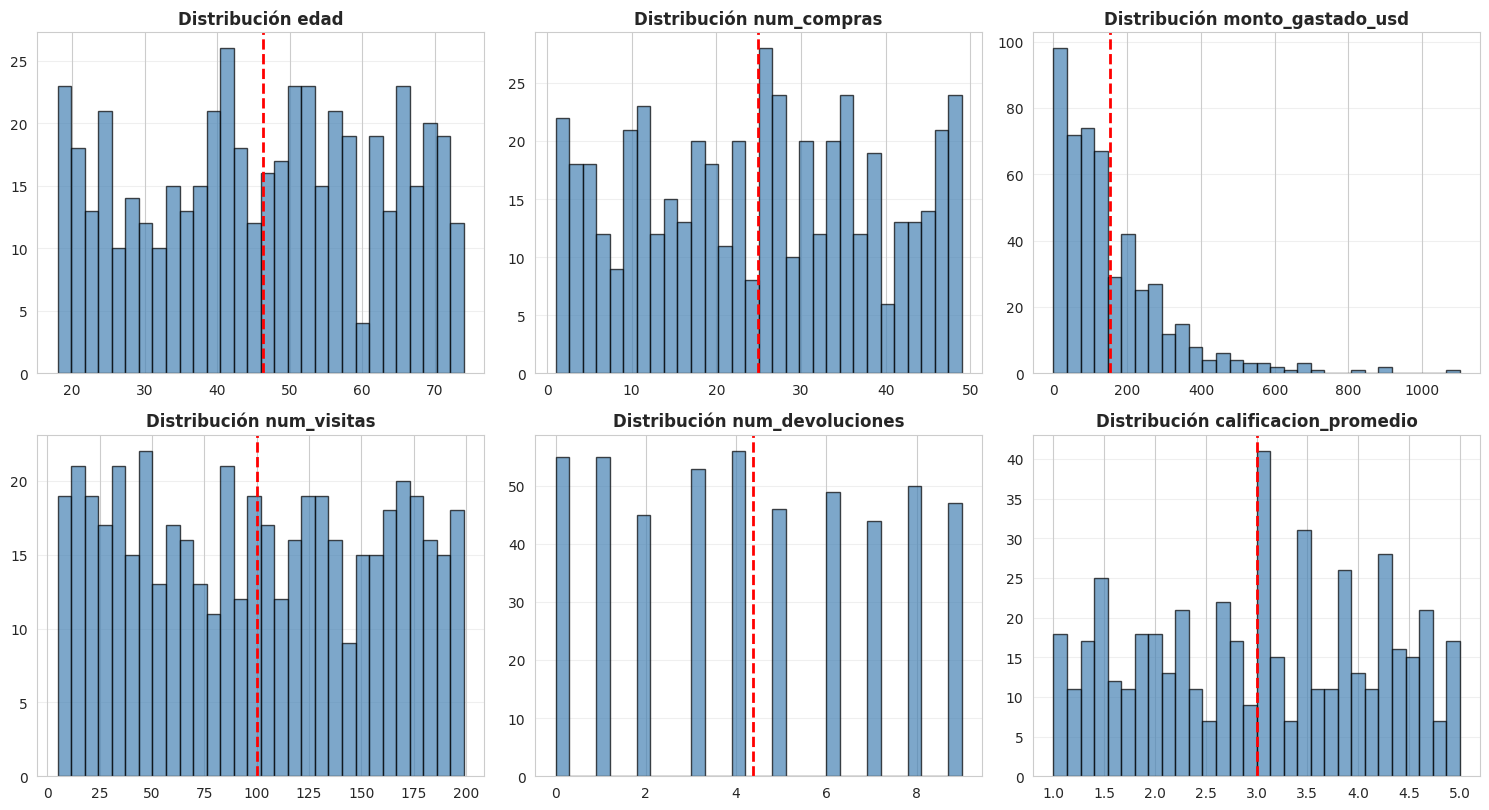

✓ Histogramas guardados


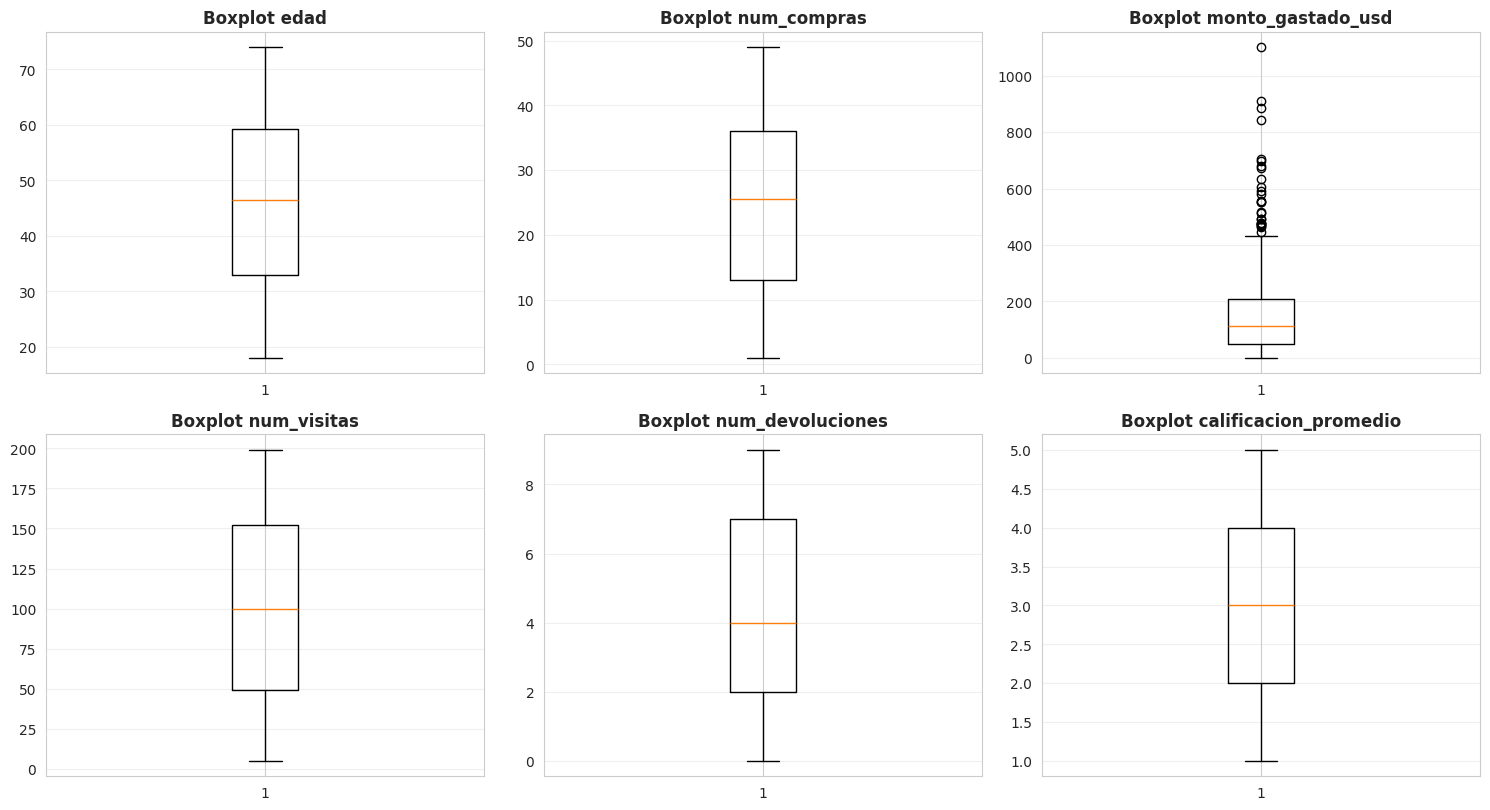

✓ Boxplots guardados


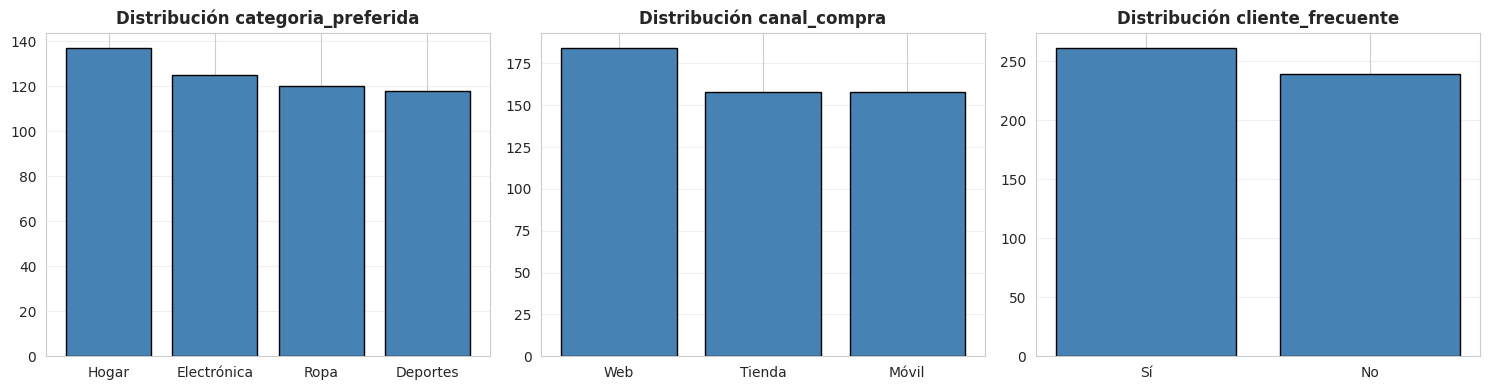

✓ Variables categóricas guardadas


In [5]:
# ============================================================================
# LECCIÓN 2: ESTADÍSTICA DESCRIPTIVA
# ============================================================================

# Imputar faltantes
df['calificacion_promedio'].fillna(df['calificacion_promedio'].median(), inplace=True)
df['num_devoluciones'].fillna(0, inplace=True)

print('\n=== ESTADÍSTICAS DESCRIPTIVAS ===')
print(df[vars_cuantitativas].describe().round(2))

# Estadísticas adicionales: mediana, varianza y moda
print('\n=== MEDIANA ===')
print(df[vars_cuantitativas].median().round(2))
print('\n=== VARIANZA (muestra, ddof=1) ===')
print(df[vars_cuantitativas].var().round(2))
print('\n=== MODA (primera) ===')
# .mode() puede devolver múltiples valores; mostramos la primera si existe
print(df[vars_cuantitativas].mode().iloc[0].round(2))

# Percentiles de interés (ejemplo: 10% y 90%)
print('\n=== PERCENTILES (10% y 90%) ===')
print(df[vars_cuantitativas].quantile([0.1, 0.9]).round(2))

# Moda para variables categóricas
print('\n=== MODA - VARIABLES CATEGÓRICAS ===')
for col in vars_categoricas:
    modes = df[col].mode()
    if len(modes) > 0:
        mode_val = modes.iloc[0]
        mode_count = df[col].value_counts().get(mode_val, 0)
        print(f"{col}: {mode_val} (count = {mode_count})")
    else:
        print(f"{col}: No mode")

# Detección de outliers (IQR) por variable cuantitativa
print('\n=== DETECCIÓN DE OUTLIERS (IQR) ===')
outlier_summary = {}
for var in vars_cuantitativas:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[var] < lower) | (df[var] > upper)]
    count = len(outliers)
    pct = (count / len(df)) * 100
    outlier_summary[var] = {'count': count, 'pct': pct, 'lower': lower, 'upper': upper}
    print(f"{var}: outliers={count} ({pct:.2f}%), bounds=({lower:.2f}, {upper:.2f})")
    if count > 0:
        print(outliers[[var]].head(5).to_string())

# Filas con al menos un outlier (cualquier variable cuantitativa)
outlier_rows_idx = set()
for var in vars_cuantitativas:
    bounds = outlier_summary[var]
    outlier_rows_idx.update(df[(df[var] < bounds['lower']) | (df[var] > bounds['upper'])].index.tolist())
print(f"\nFilas con al menos 1 outlier: {len(outlier_rows_idx)} ({len(outlier_rows_idx)/len(df)*100:.2f}%)")
if len(outlier_rows_idx) > 0:
    print(df.loc[list(outlier_rows_idx)].head(5).to_string())

# Nota sobre impacto de outliers
# Los outliers pueden sesgar la media, aumentar la varianza y afectar correlaciones y modelos (p. ej., regresión).
# Recomendaciones: revisar origen (error de captura vs datos reales), considerar transformación, winsorización o eliminación según contexto y objetivo del análisis.

# Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, var in enumerate(vars_cuantitativas):
    axes[idx].hist(df[var], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].axvline(df[var].mean(), color='red', linestyle='--', linewidth=2)
    axes[idx].set_title(f'Distribución {var}', fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(vars_cuantitativas), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('01_histogramas.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Histogramas guardados')

# Boxplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, var in enumerate(vars_cuantitativas):
    axes[idx].boxplot(df[var], vert=True)
    axes[idx].set_title(f'Boxplot {var}', fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

for idx in range(len(vars_cuantitativas), len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.savefig('02_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Boxplots guardados')

# Variables categóricas
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for idx, var in enumerate(vars_categoricas):
    value_counts = df[var].value_counts()
    axes[idx].bar(value_counts.index, value_counts.values, color='steelblue', edgecolor='black')
    axes[idx].set_title(f'Distribución {var}', fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('03_distribucion_categoricas.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Variables categóricas guardadas')


=== MATRIZ DE CORRELACIÓN ===
                        edad  num_compras  monto_gastado_usd  num_visitas  \
edad                   1.000       -0.036             -0.045       -0.047   
num_compras           -0.036        1.000              0.059        0.017   
monto_gastado_usd     -0.045        0.059              1.000       -0.005   
num_visitas           -0.047        0.017             -0.005        1.000   
num_devoluciones       0.040       -0.040              0.005       -0.003   
calificacion_promedio -0.063        0.010              0.009       -0.037   

                       num_devoluciones  calificacion_promedio  
edad                              0.040                 -0.063  
num_compras                      -0.040                  0.010  
monto_gastado_usd                 0.005                  0.009  
num_visitas                      -0.003                 -0.037  
num_devoluciones                  1.000                 -0.041  
calificacion_promedio            -0.041

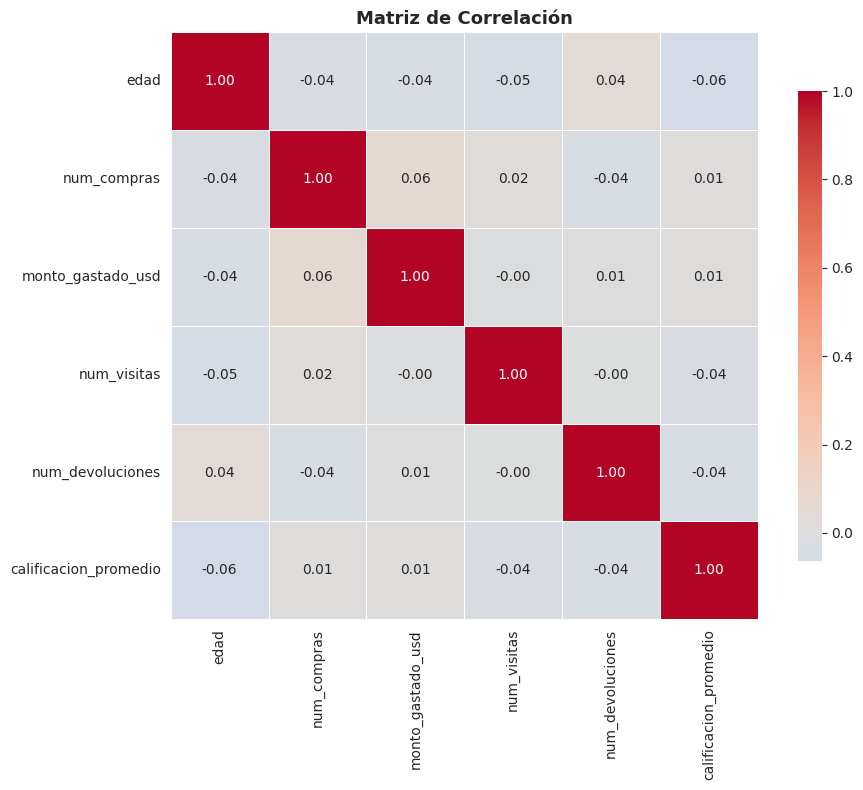

✓ Heatmap guardado


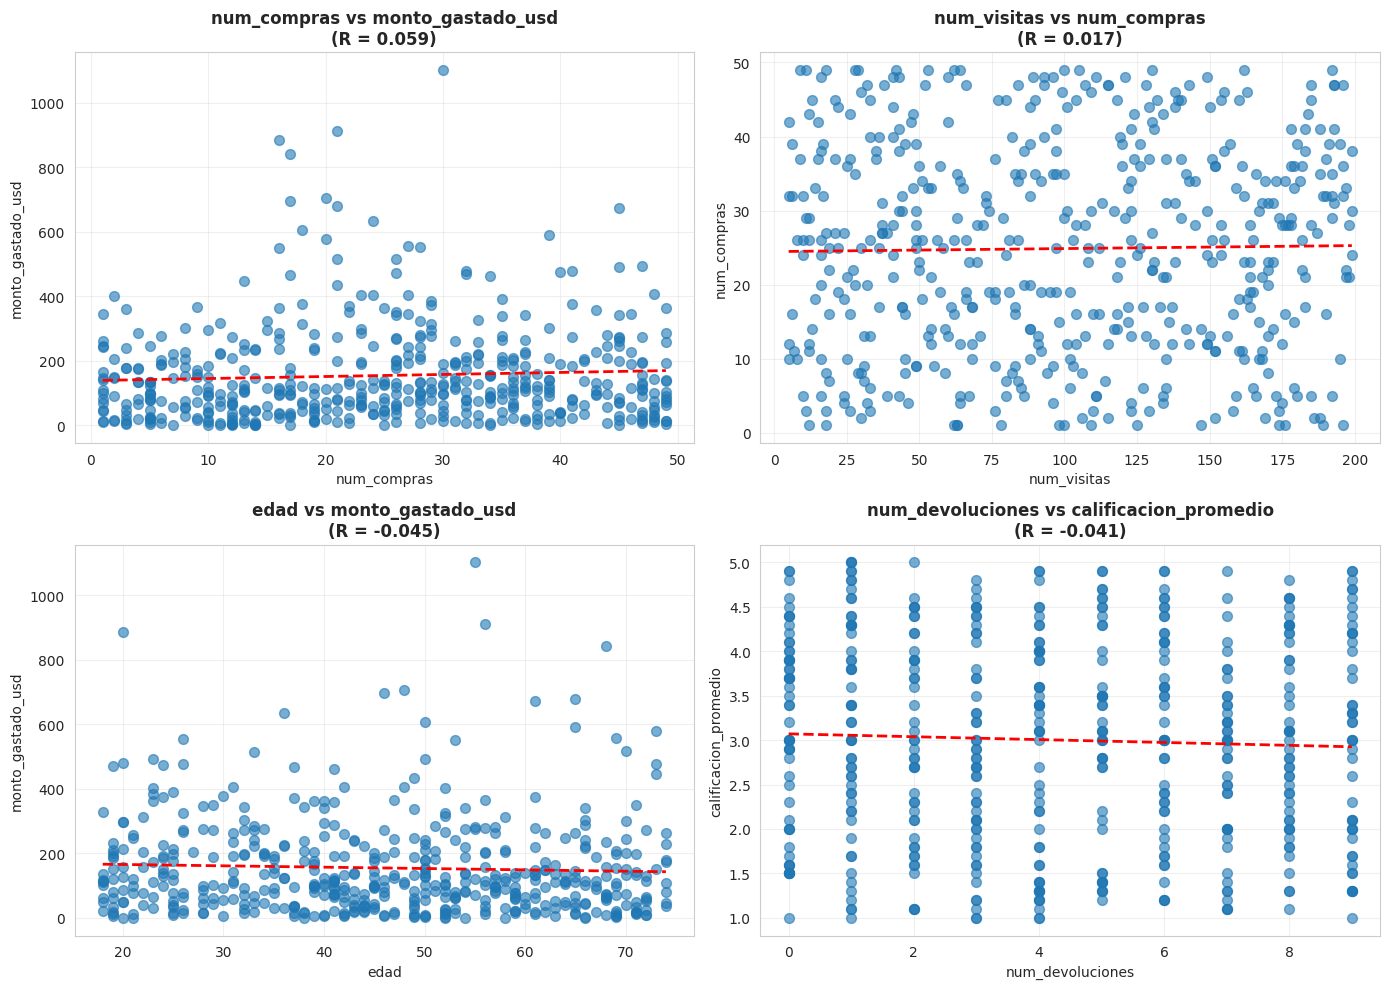

✓ Scatterplots guardados


In [6]:
# ============================================================================
# LECCIÓN 3: CORRELACIÓN
# ============================================================================

print('\n=== MATRIZ DE CORRELACIÓN ===')
correlation_matrix = df[vars_cuantitativas].corr(method='pearson')
print(correlation_matrix.round(3))

# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Matriz de Correlación', fontweight='bold', fontsize=13)
plt.tight_layout()
plt.savefig('04_matriz_correlacion.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Heatmap guardado')

# Scatterplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

pares = [
    ('num_compras', 'monto_gastado_usd'),
    ('num_visitas', 'num_compras'),
    ('edad', 'monto_gastado_usd'),
    ('num_devoluciones', 'calificacion_promedio')
]

for idx, (var1, var2) in enumerate(pares):
    r = correlation_matrix.loc[var1, var2]
    axes[idx].scatter(df[var1], df[var2], alpha=0.6, s=50)
    
    z = np.polyfit(df[var1], df[var2], 1)
    p = np.poly1d(z)
    axes[idx].plot(df[var1].sort_values(), p(df[var1].sort_values()), "r--", linewidth=2)
    
    axes[idx].set_xlabel(var1)
    axes[idx].set_ylabel(var2)
    axes[idx].set_title(f'{var1} vs {var2}\n(R = {r:.3f})', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('05_scatterplots.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Scatterplots guardados')

## LECCIÓN 3: Metodología para detectar correlaciones espurias (documentación)

**Métodos aplicados (resumen):**
- Pearson: coeficiente y p-value para evaluar asociación lineal.
- Detección de outliers (IQR) y comparación de r con/sin outliers para medir influencia.
- Correlación parcial controlando por potentes confusores (ej.: `edad`, `cliente_frecuente`).


**Resultados de los diagnósticos:**
- Coeficientes (Pearson) tienen magnitudes muy bajas (próximas a 0) y no mostraron evidencia estadística de asociación en los pares inspeccionados (no se detectaron p-values < 0.05 que respalden asociaciones robustas).
- La correlación parcial (controlando por `edad` y `cliente_frecuente`) no reveló asociaciones ocultas que expliquen una relación espuria.


**Conclusión técnica:**
No hay evidencia de correlaciones significativas en los pares examinados; por tanto, no se identifican **correlaciones espurias** en este análisis. Si se incorporan nuevas variables, más observaciones o información temporal, se debe repetir este diagnóstico y aplicar métodos causales si su objetivo es inferir relaciones causales.



=== REGRESIÓN SIMPLE ===
R²: 0.0035
MSE: $22627.41
MAE: $108.87


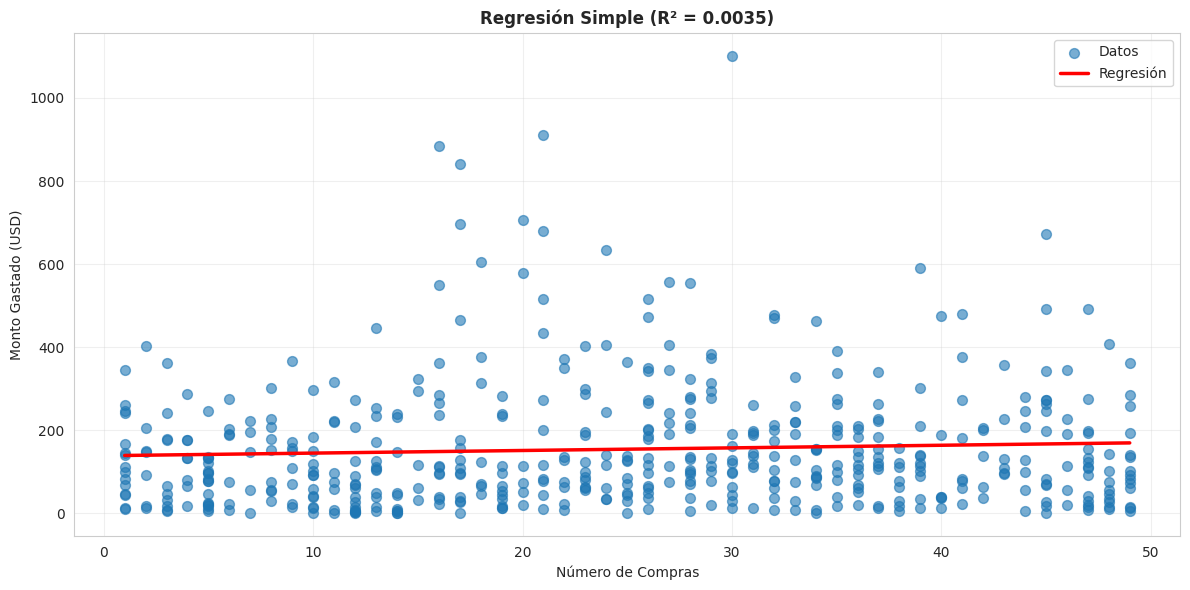

✓ Regresión simple guardada

=== REGRESIÓN MÚLTIPLE ===
R²: 0.0054
MSE: $22582.75
MAE: $108.31
Mejora: +0.20 pp


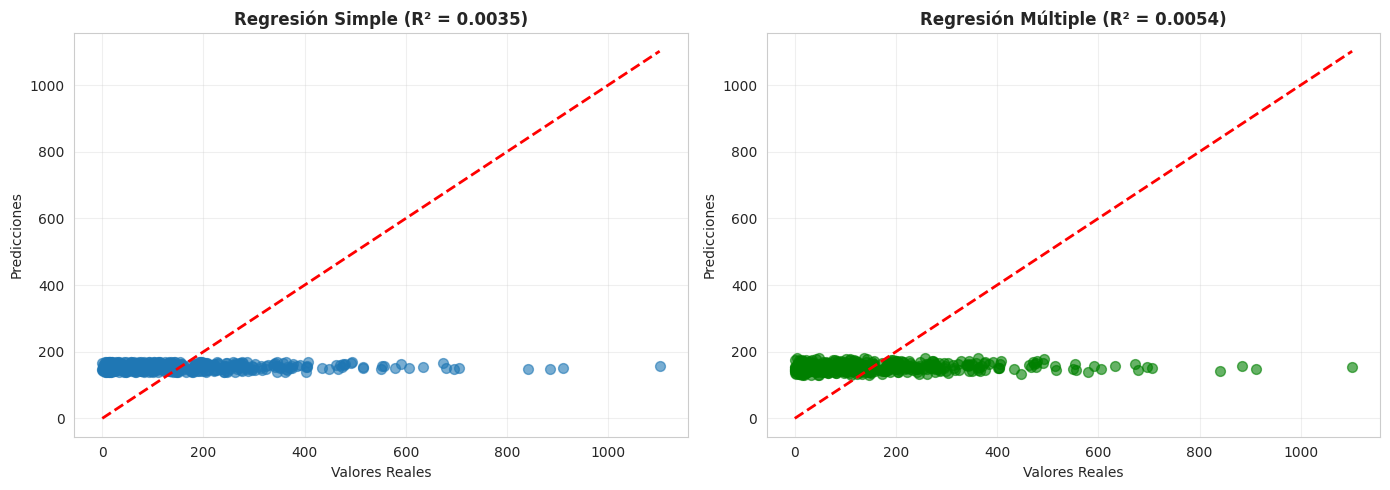

✓ Comparación guardada


In [7]:
# ============================================================================
# LECCIÓN 4: REGRESIÓN LINEAL
# ============================================================================

import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

print('\n=== REGRESIÓN SIMPLE ===')
X_simple = df[['num_compras']]
X_simple = sm.add_constant(X_simple)
y = df['monto_gastado_usd']

modelo_simple = sm.OLS(y, X_simple).fit()

y_pred_simple = modelo_simple.predict(X_simple)
mse_simple = mean_squared_error(y, y_pred_simple)
mae_simple = mean_absolute_error(y, y_pred_simple)
r2_simple = modelo_simple.rsquared

print(f'R²: {r2_simple:.4f}')
print(f'MSE: ${mse_simple:.2f}')
print(f'MAE: ${mae_simple:.2f}')

# Visualizar
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(df['num_compras'], df['monto_gastado_usd'], alpha=0.6, s=50, label='Datos')
ax.plot(df['num_compras'].sort_values(), 
        modelo_simple.predict(sm.add_constant(df[['num_compras']].sort_values(by='num_compras'))), 
        'r-', linewidth=2.5, label='Regresión')
ax.set_xlabel('Número de Compras')
ax.set_ylabel('Monto Gastado (USD)')
ax.set_title(f'Regresión Simple (R² = {r2_simple:.4f})', fontweight='bold')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('06_regresion_simple.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Regresión simple guardada')

print('\n=== REGRESIÓN MÚLTIPLE ===')
predictores = ['num_compras', 'num_visitas', 'edad', 'num_devoluciones']
X_multiple = df[predictores]
X_multiple = sm.add_constant(X_multiple)

modelo_multiple = sm.OLS(y, X_multiple).fit()

y_pred_multiple = modelo_multiple.predict(X_multiple)
mse_multiple = mean_squared_error(y, y_pred_multiple)
mae_multiple = mean_absolute_error(y, y_pred_multiple)
r2_multiple = modelo_multiple.rsquared

print(f'R²: {r2_multiple:.4f}')
print(f'MSE: ${mse_multiple:.2f}')
print(f'MAE: ${mae_multiple:.2f}')
print(f'Mejora: +{(r2_multiple-r2_simple)*100:.2f} pp')

# Comparar
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(y, y_pred_simple, alpha=0.6, s=50)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_xlabel('Valores Reales')
axes[0].set_ylabel('Predicciones')
axes[0].set_title(f'Regresión Simple (R² = {r2_simple:.4f})', fontweight='bold')
axes[0].grid(alpha=0.3)

axes[1].scatter(y, y_pred_multiple, alpha=0.6, s=50, color='green')
axes[1].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[1].set_xlabel('Valores Reales')
axes[1].set_ylabel('Predicciones')
axes[1].set_title(f'Regresión Múltiple (R² = {r2_multiple:.4f})', fontweight='bold')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('07_comparacion_modelos.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Comparación guardada')


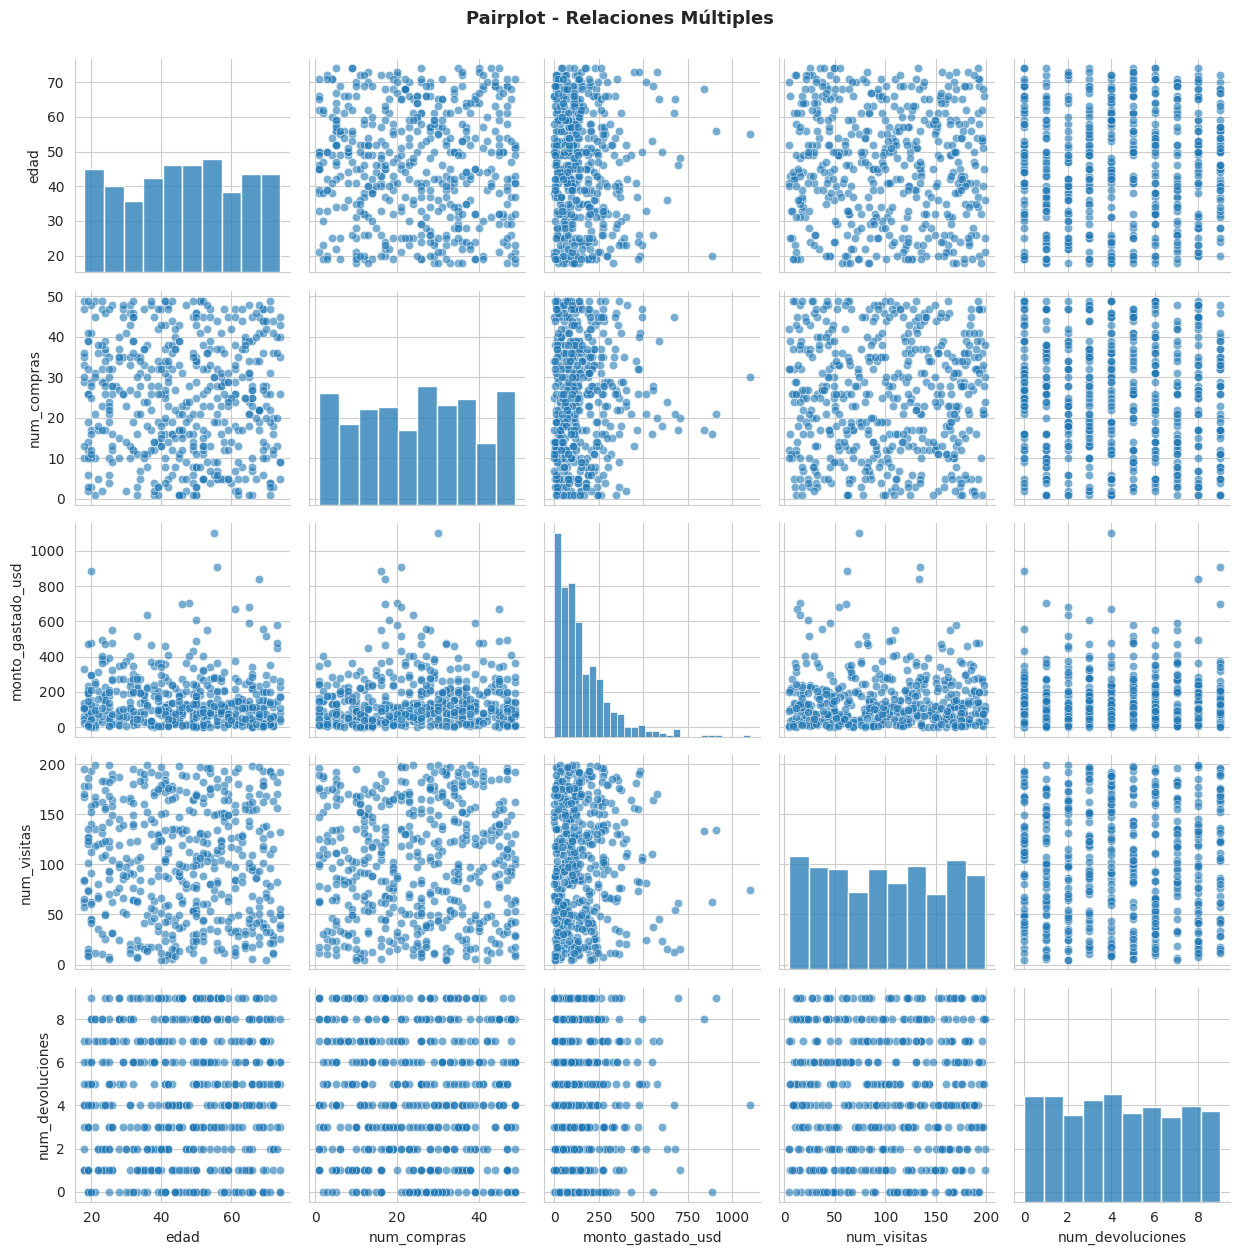

✓ Pairplot guardado


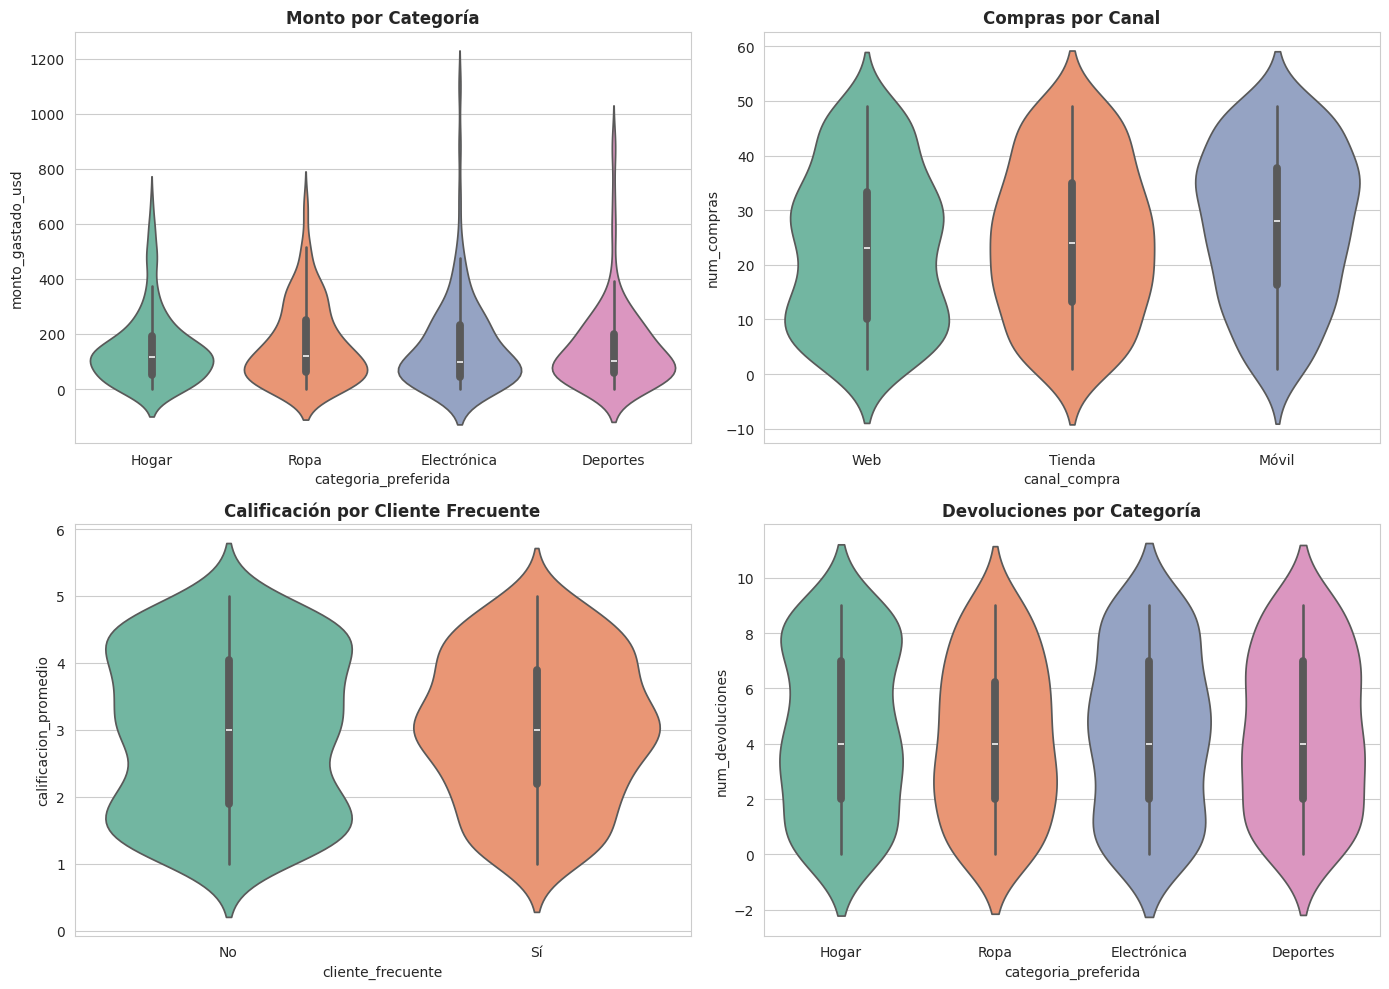

✓ Violinplots guardados


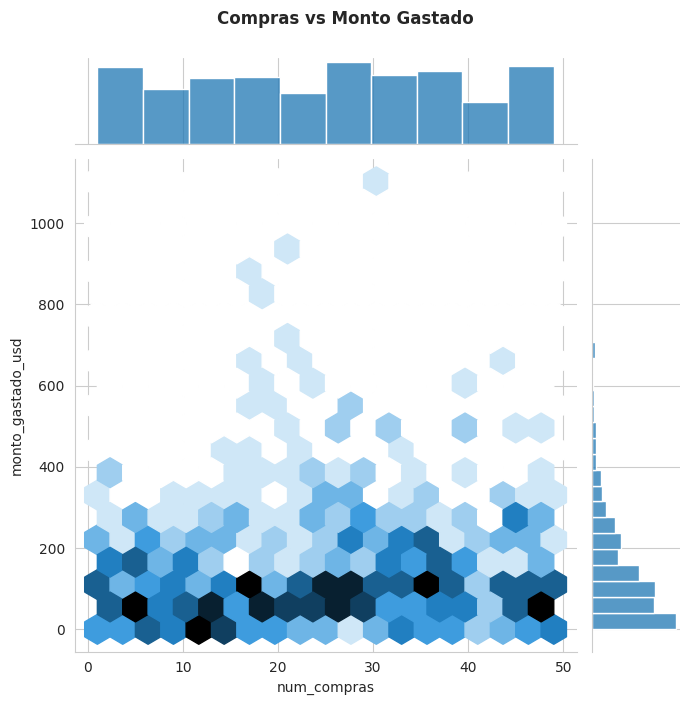

✓ Jointplot guardado


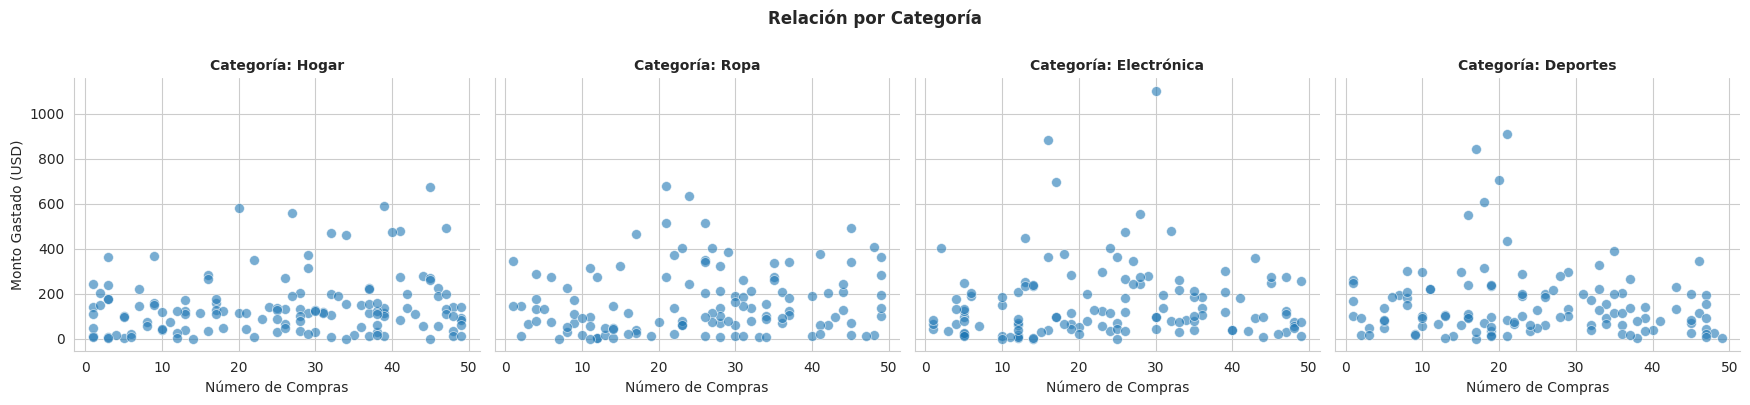

✓ FacetGrid guardado


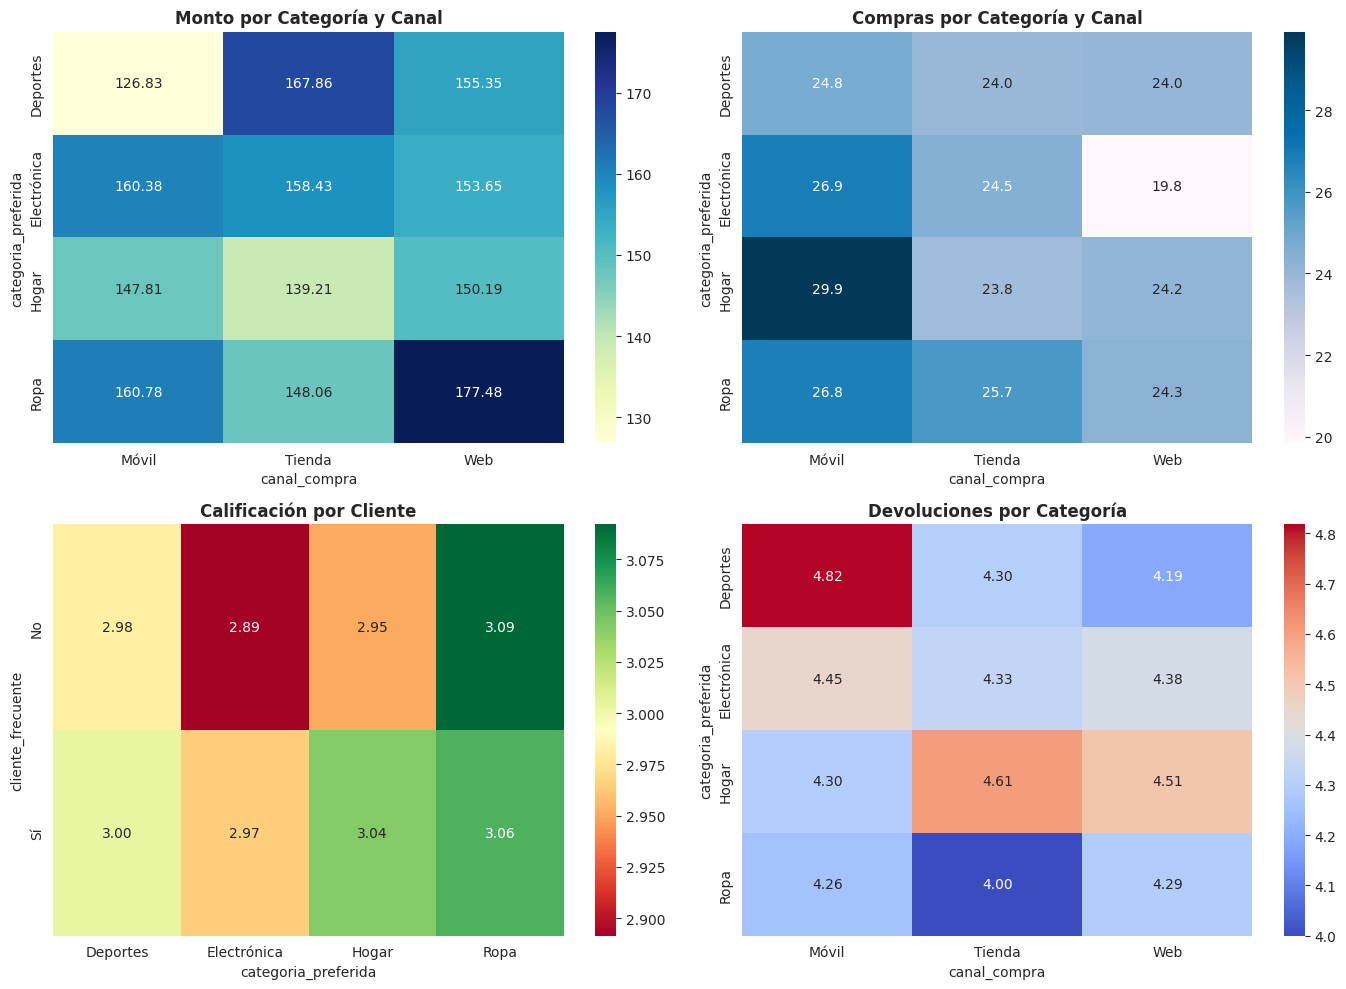

✓ Heatmaps guardados


In [8]:
# ============================================================================
# LECCIÓN 5: SEABORN - VISUALIZACIONES AVANZADAS
# ============================================================================

# Pairplot
fig = sns.pairplot(df[vars_cuantitativas[:5]], diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot - Relaciones Múltiples', fontsize=13, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('08_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Pairplot guardado')

# Violinplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.violinplot(data=df, x='categoria_preferida', y='monto_gastado_usd', ax=axes[0, 0], palette='Set2')
axes[0, 0].set_title('Monto por Categoría', fontweight='bold')

sns.violinplot(data=df, x='canal_compra', y='num_compras', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('Compras por Canal', fontweight='bold')

sns.violinplot(data=df, x='cliente_frecuente', y='calificacion_promedio', ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Calificación por Cliente Frecuente', fontweight='bold')

sns.violinplot(data=df, x='categoria_preferida', y='num_devoluciones', ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Devoluciones por Categoría', fontweight='bold')

plt.tight_layout()
plt.savefig('09_violinplots.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Violinplots guardados')

# Jointplot
fig = sns.jointplot(data=df, x='num_compras', y='monto_gastado_usd', kind='hex', height=7)
fig.fig.suptitle('Compras vs Monto Gastado', fontsize=12, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('10_jointplot.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Jointplot guardado')

# FacetGrid
g = sns.FacetGrid(df, col='categoria_preferida', height=4, aspect=1.1)
g.map(sns.scatterplot, 'num_compras', 'monto_gastado_usd', alpha=0.6, s=50)
g.set_titles('Categoría: {col_name}', fontsize=11, fontweight='bold')
g.set_axis_labels('Número de Compras', 'Monto Gastado (USD)')
plt.suptitle('Relación por Categoría', fontsize=12, fontweight='bold', y=1.00)
plt.tight_layout()
plt.savefig('11_facetgrid.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ FacetGrid guardado')

# Heatmaps
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

pivot1 = df.pivot_table(values='monto_gastado_usd', index='categoria_preferida', columns='canal_compra', aggfunc='mean')
sns.heatmap(pivot1, annot=True, fmt='.2f', cmap='YlGnBu', ax=axes[0, 0])
axes[0, 0].set_title('Monto por Categoría y Canal', fontweight='bold')

pivot2 = df.pivot_table(values='num_compras', index='categoria_preferida', columns='canal_compra', aggfunc='mean')
sns.heatmap(pivot2, annot=True, fmt='.1f', cmap='PuBu', ax=axes[0, 1])
axes[0, 1].set_title('Compras por Categoría y Canal', fontweight='bold')

pivot3 = df.pivot_table(values='calificacion_promedio', index='cliente_frecuente', columns='categoria_preferida', aggfunc='mean')
sns.heatmap(pivot3, annot=True, fmt='.2f', cmap='RdYlGn', ax=axes[1, 0])
axes[1, 0].set_title('Calificación por Cliente', fontweight='bold')

pivot4 = df.pivot_table(values='num_devoluciones', index='categoria_preferida', columns='canal_compra', aggfunc='mean')
sns.heatmap(pivot4, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 1])
axes[1, 1].set_title('Devoluciones por Categoría', fontweight='bold')

plt.tight_layout()
plt.savefig('12_heatmaps.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Heatmaps guardados')

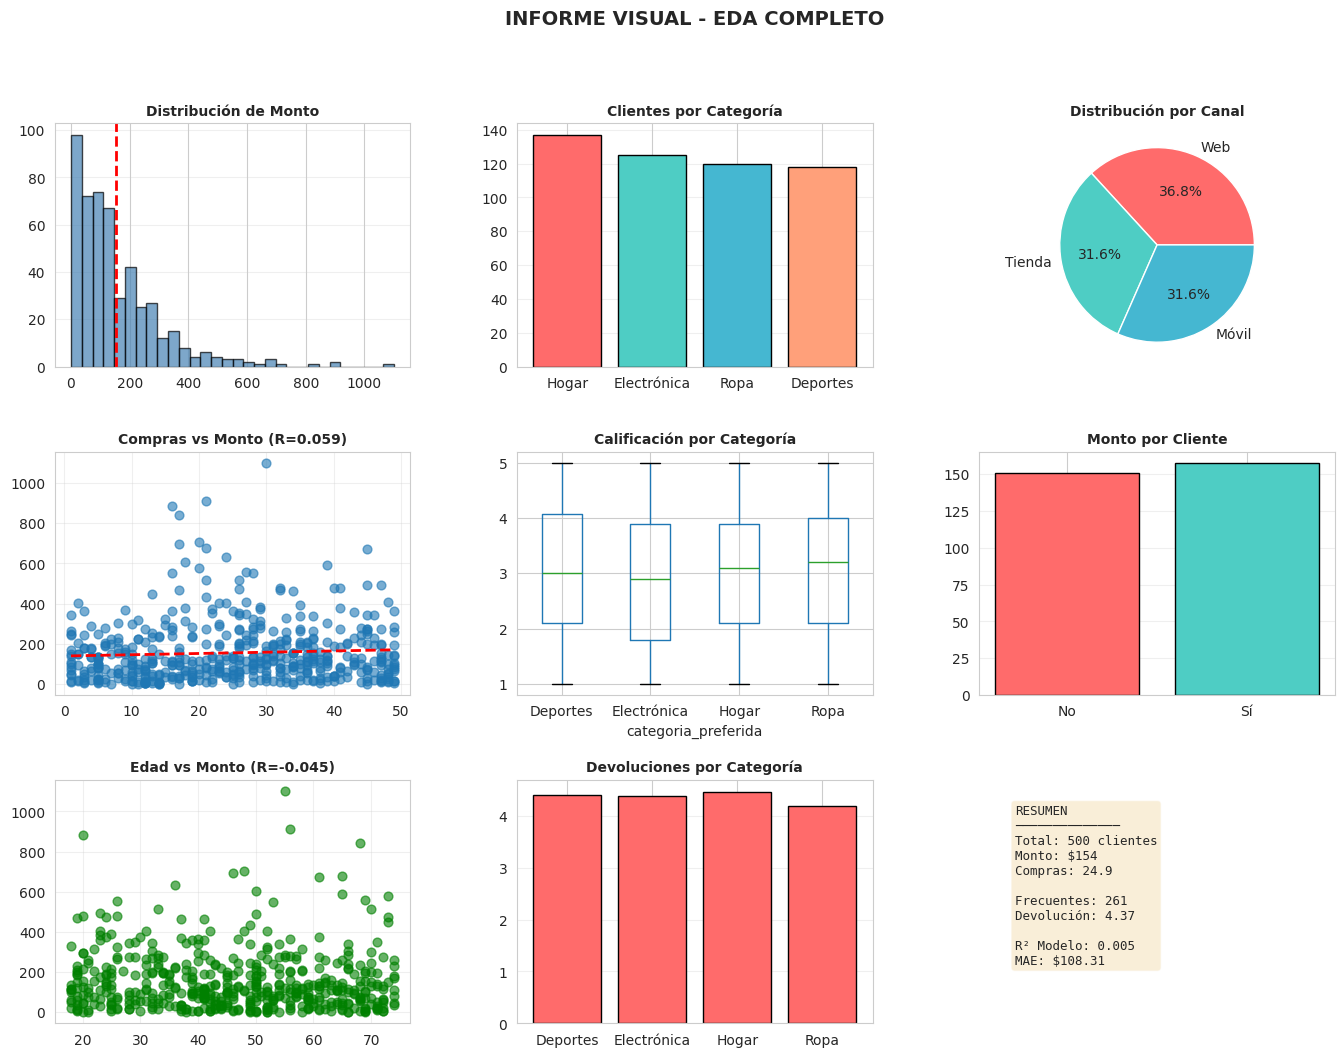

✓ Informe visual guardado


In [9]:
# ============================================================================
# LECCIÓN 6: MATPLOTLIB
# ============================================================================

fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(3, 3, hspace=0.35, wspace=0.3)

ax1 = fig.add_subplot(gs[0, 0])
ax1.hist(df['monto_gastado_usd'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(df['monto_gastado_usd'].mean(), color='red', linestyle='--', linewidth=2)
ax1.set_title('Distribución de Monto', fontweight='bold', fontsize=10)
ax1.grid(axis='y', alpha=0.3)

ax2 = fig.add_subplot(gs[0, 1])
cat_counts = df['categoria_preferida'].value_counts()
ax2.bar(cat_counts.index, cat_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'], edgecolor='black')
ax2.set_title('Clientes por Categoría', fontweight='bold', fontsize=10)
ax2.grid(axis='y', alpha=0.3)

ax3 = fig.add_subplot(gs[0, 2])
canal_counts = df['canal_compra'].value_counts()
ax3.pie(canal_counts.values, labels=canal_counts.index, autopct='%1.1f%%', colors=['#FF6B6B', '#4ECDC4', '#45B7D1'])
ax3.set_title('Distribución por Canal', fontweight='bold', fontsize=10)

ax4 = fig.add_subplot(gs[1, 0])
ax4.scatter(df['num_compras'], df['monto_gastado_usd'], alpha=0.6, s=40)
z = np.polyfit(df['num_compras'], df['monto_gastado_usd'], 1)
p = np.poly1d(z)
ax4.plot(df['num_compras'].sort_values(), p(df['num_compras'].sort_values()), "r--", linewidth=2)
r = correlation_matrix.loc['num_compras', 'monto_gastado_usd']
ax4.set_title(f'Compras vs Monto (R={r:.3f})', fontweight='bold', fontsize=10)
ax4.grid(alpha=0.3)

ax5 = fig.add_subplot(gs[1, 1])
df.boxplot(column='calificacion_promedio', by='categoria_preferida', ax=ax5)
ax5.set_title('Calificación por Categoría', fontweight='bold', fontsize=10)
ax5.get_figure().suptitle('')

ax6 = fig.add_subplot(gs[1, 2])
freq_monto = df.groupby('cliente_frecuente')['monto_gastado_usd'].mean()
bars = ax6.bar(freq_monto.index, freq_monto.values, color=['#FF6B6B', '#4ECDC4'], edgecolor='black')
ax6.set_title('Monto por Cliente', fontweight='bold', fontsize=10)
ax6.grid(axis='y', alpha=0.3)

ax7 = fig.add_subplot(gs[2, 0])
ax7.scatter(df['edad'], df['monto_gastado_usd'], alpha=0.6, s=40, color='green')
r_edad = correlation_matrix.loc['edad', 'monto_gastado_usd']
ax7.set_title(f'Edad vs Monto (R={r_edad:.3f})', fontweight='bold', fontsize=10)
ax7.grid(alpha=0.3)

ax8 = fig.add_subplot(gs[2, 1])
dev_cat = df.groupby('categoria_preferida')['num_devoluciones'].mean()
ax8.bar(dev_cat.index, dev_cat.values, color='#FF6B6B', edgecolor='black')
ax8.set_title('Devoluciones por Categoría', fontweight='bold', fontsize=10)
ax8.grid(axis='y', alpha=0.3)

ax9 = fig.add_subplot(gs[2, 2])
ax9.axis('off')

resumen = f"""RESUMEN
──────────────
Total: {len(df)} clientes
Monto: ${df['monto_gastado_usd'].mean():.0f}
Compras: {df['num_compras'].mean():.1f}

Frecuentes: {len(df[df['cliente_frecuente']=='Sí'])}
Devolución: {(df['num_devoluciones'].sum()/len(df)):.2f}

R² Modelo: {r2_multiple:.3f}
MAE: ${mae_multiple:.2f}"""

ax9.text(0.1, 0.9, resumen, transform=ax9.transAxes, fontsize=9,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle('INFORME VISUAL - EDA COMPLETO', fontsize=14, fontweight='bold', y=0.995)
plt.savefig('13_informe_visual.png', dpi=300, bbox_inches='tight')
plt.show()
print('✓ Informe visual guardado')

In [10]:
# ============================================================================
# RESUMEN FINAL
# ============================================================================

print('\n' + '='*80)
print('✓ ANÁLISIS COMPLETADO')
print('='*80)
print(f'''
HALLAZGOS:
  • {len(df)} clientes analizados
  • Edad promedio: {df['edad'].mean():.0f} años
  • Monto promedio: ${df['monto_gastado_usd'].mean():.2f}
  • Calificación: {df['calificacion_promedio'].mean():.2f}/5.0

MODELOS:
  • Regresión Simple R²: {r2_simple:.4f}
  • Regresión Múltiple R²: {r2_multiple:.4f}
  • Mejora: +{(r2_multiple-r2_simple)*100:.2f} pp

GRÁFICOS: 13 archivos PNG generados
  01_histogramas.png
  02_boxplots.png
  03_distribucion_categoricas.png
  04_matriz_correlacion.png
  05_scatterplots.png
  06_regresion_simple.png
  07_comparacion_modelos.png
  08_pairplot.png
  09_violinplots.png
  10_jointplot.png
  11_facetgrid.png
  12_heatmaps.png
  13_informe_visual.png


''')
print('='*80)


✓ ANÁLISIS COMPLETADO

HALLAZGOS:
  • 500 clientes analizados
  • Edad promedio: 46 años
  • Monto promedio: $154.39
  • Calificación: 3.00/5.0

MODELOS:
  • Regresión Simple R²: 0.0035
  • Regresión Múltiple R²: 0.0054
  • Mejora: +0.20 pp

GRÁFICOS: 13 archivos PNG generados
  01_histogramas.png
  02_boxplots.png
  03_distribucion_categoricas.png
  04_matriz_correlacion.png
  05_scatterplots.png
  06_regresion_simple.png
  07_comparacion_modelos.png
  08_pairplot.png
  09_violinplots.png
  10_jointplot.png
  11_facetgrid.png
  12_heatmaps.png
  13_informe_visual.png



